- Use Seaborn for quick statistics: countplots/histplots of PSTATUS, HEIGHTM distributions, box/violin plots of HEIGHTM by HIMAL, bar plots of success rate by route and oxygen use; use Matplotlib when you need more low‑level control or publication‑quality tweaks.
- Build multi‑panel figures to compare ranges or time periods, annotate important peaks or outliers, and always link visuals directly to the project questions (e.g., “Which mountain range has the highest average peak height?”).
- Save plots with clear filenames and resolutions, and document insights inline in notebook (e.g., observations about outliers, unusual termination reasons, or inconsistent codes).

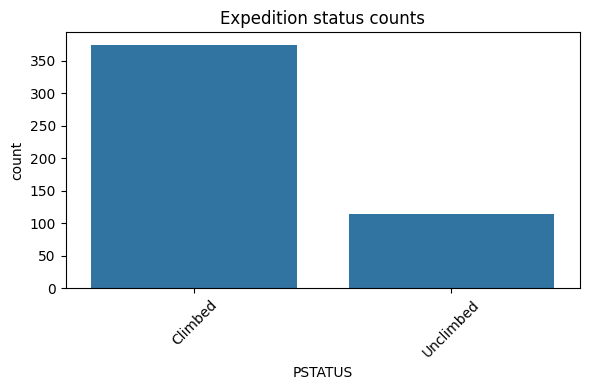

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

 
expeddf = pd.read_csv("himalayan_tidy/expeddf_tidy.csv", low_memory=False)
peaksdf = pd.read_csv("himalayan_tidy/peaksdf_tidy.csv", low_memory=False)
#PSTATUS distribution
plt.figure(figsize=(6,4))
sns.countplot(data=peaksdf,x="PSTATUS")
plt.title("Expedition status counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("himalayan_aggregates/pstatu_countplot", dpi=150)


- Most expeditions fall into the **dominant status category, e.g. "Success"**, with far fewer classified as **other key status, e.g. "Failure" or "Ongoing"**.  
- Rare status codes with only a handful of records may need to be grouped or checked against the documentation before further analysis.



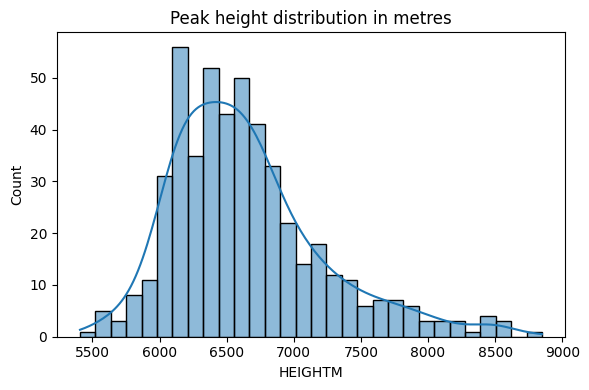

In [15]:
#HEIGHTM histogram

plt.figure(figsize=(6,4))
sns.histplot(data=peaksdf, x="HEIGHTM", bins=30, kde=True)
plt.title("Peak height distribution in metres")
plt.tight_layout()
plt.savefig("himalayan_aggregates/heightm_hist", dpi = 150)

- Most peaks cluster between 6,000 m and 7,000 m, with relatively few below 5,500 m or above 7,500 m.  
- The distribution is slightly right‑skewed, with a small tail of very high peaks.

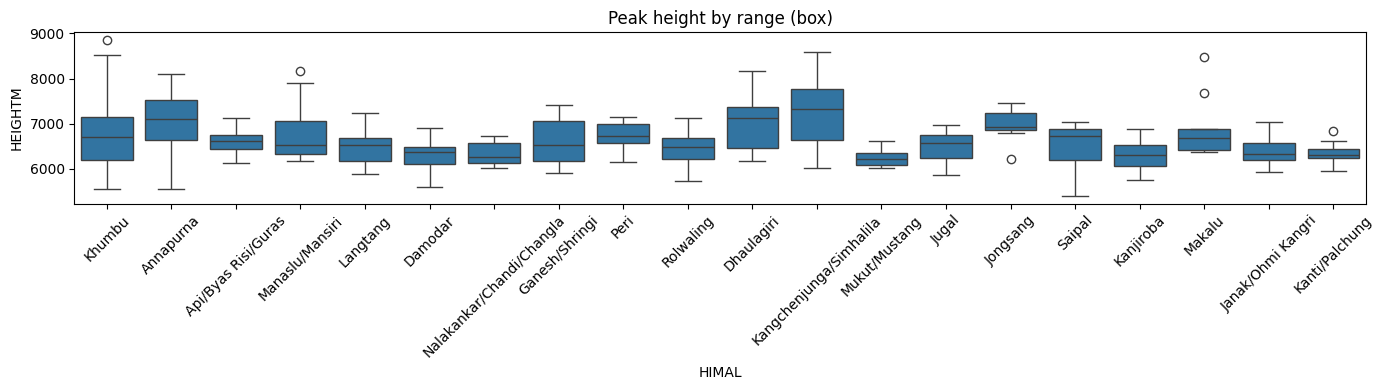

In [16]:
#HEIGHTM by HIMAL (box)

plt.figure(figsize=(14,4))
sns.boxplot(data=peaksdf, x="HIMAL", y="HEIGHTM")
plt.xticks(rotation=45)
plt.title("Peak height by range (box)")
plt.tight_layout()
#plt.savefig("Himalayan_aggretates/height_by_range_box")
         

- Annapurna shows more low‑height peaks than Khumbu (including Everest), whose peaks are generally higher.  
- One or two extreme outliers appear in several ranges, indicating isolated very high peaks compared with their neighbours.

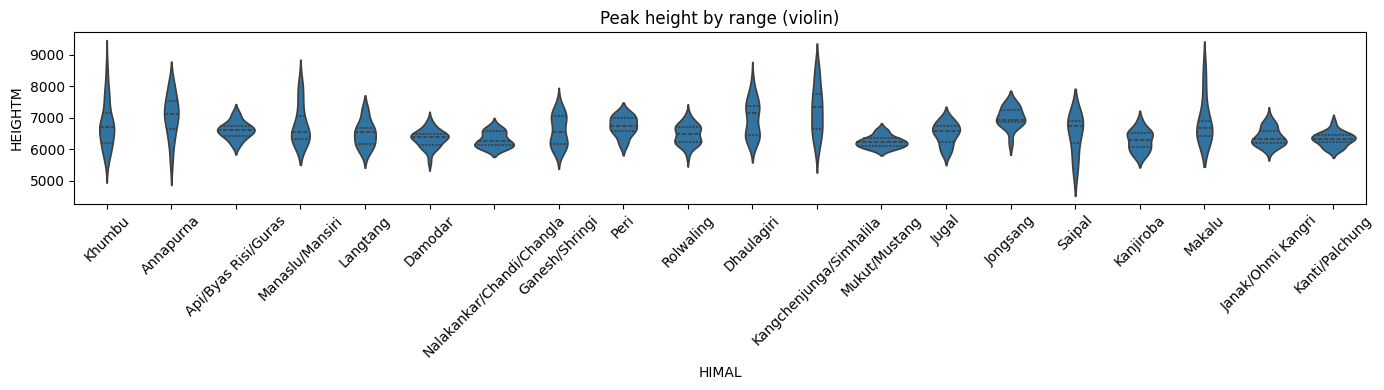

In [17]:
#HEIGHTM by HIMAL (violin)

plt.figure(figsize=(14,4))
sns.violinplot(data=peaksdf, x="HIMAL", y="HEIGHTM", inner="quartile")
plt.xticks(rotation=45)
plt.title("Peak height by range (violin)")
plt.tight_layout()
plt.savefig("himalayan_aggregates/height_by_range_violin")

What about Evereset?!? It's part of the Khumbu sub-range within the Himalayan range and is maybe the original outlier?!

Text(5, 3, 'Everest')

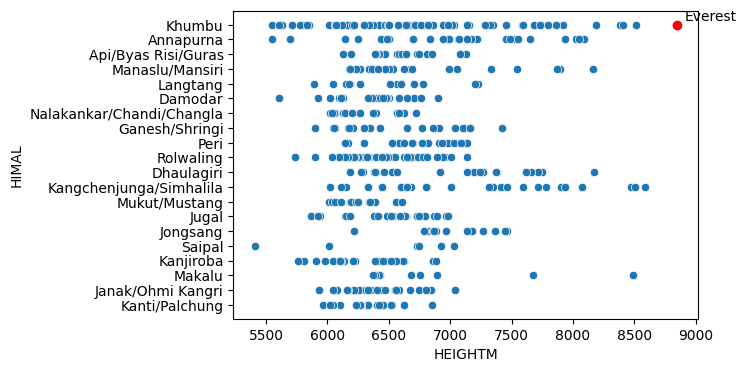

In [23]:
everest = peaksdf[peaksdf["PKNAME"] == "Everest"]

plt.figure(figsize=(6,4))
sns.scatterplot(data=peaksdf, x="HEIGHTM", y="HIMAL")
plt.scatter(everest["HEIGHTM"], everest["HIMAL"], color="red")
plt.annotate("Everest", (everest["HEIGHTM"].iloc[0], everest["HIMAL"].iloc[0]),
             xytext=(5,3), textcoords="offset points")


Use the flags from the previous round. 

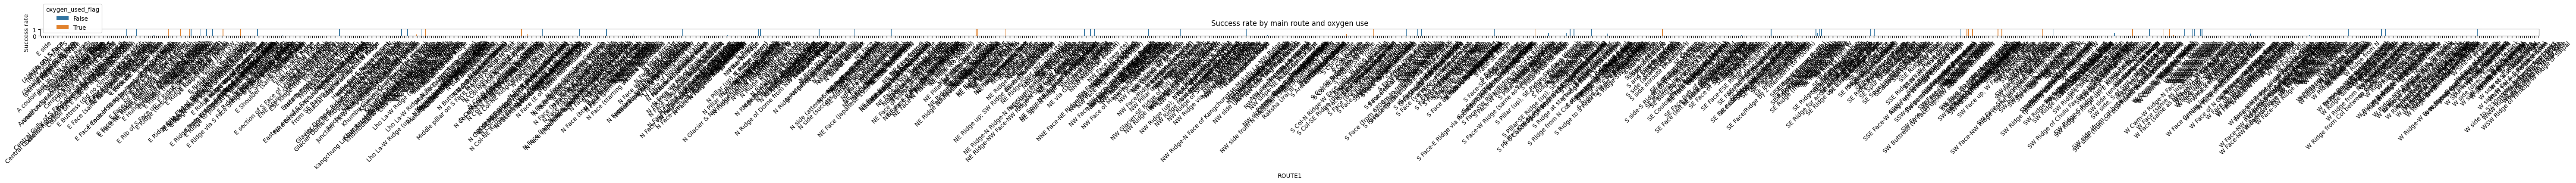

In [24]:
# 1. Build flags on expeddf
death_cols = ["MDEATHS", "HDEATHS"]
expeddf["success_flag"] = expeddf["SUCCESS2"]   # or your cleaned success column
expeddf["oxygen_used_flag"] = expeddf["O2USED"] > 0
expeddf["death_flag"] = expeddf[death_cols].gt(0).any(axis=1)

# Assume success_flag (True/False) and ROUTE1, oxygen_used_flag already exist
route_oxy = (
    expeddf
    .groupby(["ROUTE1", "oxygen_used_flag"])["success_flag"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(60,4))
sns.barplot(
    data=route_oxy,
    x="ROUTE1", y="success_flag",
    hue="oxygen_used_flag"
)
plt.xticks(rotation=45)
plt.ylabel("Success rate")
plt.title("Success rate by main route and oxygen use")
plt.tight_layout()
plt.savefig("himalayan_aggregates/success_by_route_oxygen.png", dpi=150)


In [25]:
print(expeddf.columns.tolist())

['EXPID', 'PEAKID', 'YEAR', 'SEASON', 'HOST', 'ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4', 'NATION', 'LEADERS', 'SPONSOR', 'SUCCESS1', 'SUCCESS2', 'SUCCESS3', 'SUCCESS4', 'ASCENT1', 'ASCENT2', 'ASCENT3', 'ASCENT4', 'CLAIMED', 'DISPUTED', 'COUNTRIES', 'APPROACH', 'BCDATE', 'SMTDATE', 'SMTTIME', 'SMTDAYS', 'TOTDAYS', 'TERMDATE', 'TERMREASON', 'TERMNOTE', 'HIGHPOINT', 'TRAVERSE', 'SKI', 'PARAPENTE', 'CAMPS', 'ROPE', 'TOTMEMBERS', 'SMTMEMBERS', 'MDEATHS', 'TOTHIRED', 'SMTHIRED', 'HDEATHS', 'NOHIRED', 'O2USED', 'O2NONE', 'O2CLIMB', 'O2DESCENT', 'O2SLEEP', 'O2MEDICAL', 'O2TAKEN', 'O2UNKWN', 'OTHERSMTS', 'CAMPSITES', 'ROUTEMEMO', 'ACCIDENTS', 'ACHIEVMENT', 'AGENCY', 'COMRTE', 'STDRTE', 'PRIMRTE', 'PRIMMEM', 'PRIMREF', 'PRIMID', 'CHKSUM', 'success_flag', 'oxygen_used_flag', 'death_flag']


Compare height distributions for some of the ranges

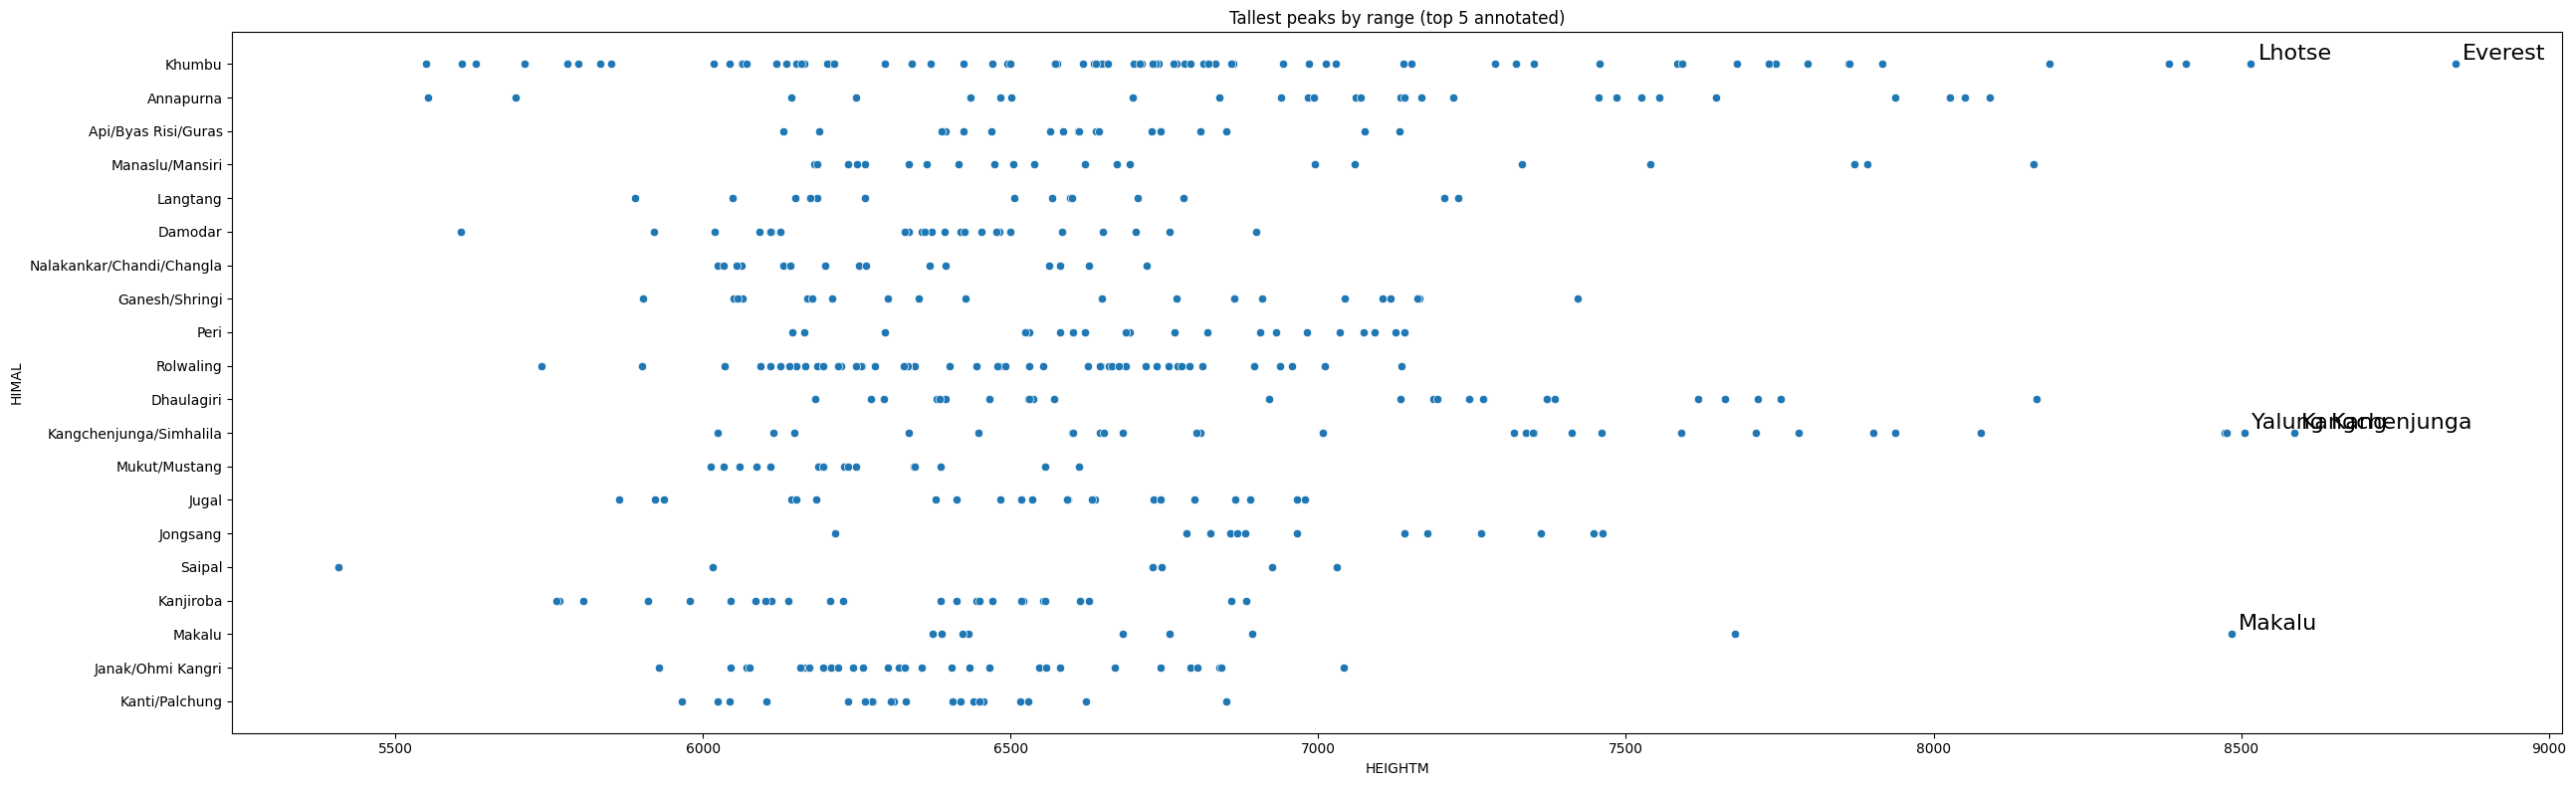

In [26]:
# Highlight tallest few peaks
top_peaks = peaksdf.nlargest(5, "HEIGHTM")

plt.figure(figsize=(26,8))
sns.scatterplot(data=peaksdf, x="HEIGHTM", y="HIMAL")
for _, row in top_peaks.iterrows():
    plt.annotate(
        row["PKNAME"],
        (row["HEIGHTM"], row["HIMAL"]),
        xytext=(5, 3),
        textcoords="offset points",
        fontsize=16
    )
plt.title("Tallest peaks by range (top 5 annotated)")
plt.tight_layout()
plt.savefig("himalayan_aggregates/top_peaks_annotated.png", dpi=150)


In [37]:
import plotly.express as px

# --- 1. Build flags on expeddf ---

death_cols = ["MDEATHS", "HDEATHS"]

expeddf["success_flag"] = expeddf["SUCCESS2"]             
expeddf["oxygen_used_flag"] = expeddf["O2USED"] > 0
expeddf["death_flag"] = expeddf[death_cols].gt(0).any(axis=1)

# --- 2. Merge HEIGHTM and HIMAL from peaksdf into expeddf  ---

if "HEIGHTM" not in expeddf.columns or "HIMAL" not in expeddf.columns:
    expeddf = expeddf.merge(
        peaksdf[["PEAKID", "HEIGHTM", "HIMAL"]],
        on="PEAKID",
        how="left"
    )

# --- 3. route_oxy table for bar chart ---

route_oxy = (
    expeddf
    .groupby(["ROUTE1", "oxygen_used_flag"])["success_flag"]
    .mean()
    .reset_index()
)

# --- 4. Plotly figures ---

# Bar: success rate by route & oxygen
fig_route = px.bar(
    route_oxy,
    x="ROUTE1",
    y="success_flag",
    color="oxygen_used_flag",
    barmode="group",
    labels={"success_flag": "Success rate", "ROUTE1": "Route", "oxygen_used_flag": "Oxygen used"},
    title="Success rate by route and oxygen use"
)
fig_route.show()

# Scatter: height vs success, coloured by HIMAL
fig_scatter = px.scatter(
    expeddf,
    x="HEIGHTM",
    y="success_flag",
    color="HIMAL",
    hover_data=["YEAR"],
    labels={"HEIGHTM": "Height (m)", "success_flag": "Success (0/1)"},
    title="Expedition success by peak height and range"
)
fig_scatter.show()

# Histogram: HEIGHTM split by oxygen flag
fig_hist = px.histogram(
    expeddf,
    x="HEIGHTM",
    color="oxygen_used_flag",
    nbins=30,
    barmode="overlay",
    opacity=0.6,
    labels={"HEIGHTM": "Height (m)", "oxygen_used_flag": "Oxygen used"},
    title="Height distribution by oxygen use"
)
fig_hist.show()
